### 1. 라이브러리 선언및 데이터 불러오기 (타입통합/숫자컬럼추가)

In [1]:
# 라이브러리 정의 import tensorflow.keras
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd

In [2]:
featuresData = pd.read_csv("../dataset/feature_regression_example.csv")
featuresData.dtypes
featuresData.head(2)

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201501,2015,1,1225,Y,1,Y,0.209442
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201502,2015,2,968,N,4,Y,0.209442


In [3]:
from sklearn.preprocessing import LabelEncoder
le_yn = LabelEncoder()


In [4]:
featuresData["LE_PROMO"] = le_yn.fit_transform(featuresData.PROMOTION)
featuresData["LE_HORI"] = le_yn.fit_transform(featuresData.HOLIDAY)

In [5]:
le_yn.inverse_transform(featuresData.LE_PROMO)

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'N', 'N', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'N'], dtype=object)

In [6]:
featuresData.head(4)

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,LE_PROMO,LE_HORI
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201501,2015,1,1225,Y,1,Y,0.209442,1,1
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201502,2015,2,968,N,4,Y,0.209442,1,0
2,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201503,2015,3,1209,N,4,Y,0.208155,1,0
3,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201504,2015,4,1810,Y,2,Y,0.208155,1,1


### 특성전정

In [7]:
# features = list(featuresData.select_dtypes(np.number).columns)
# features
label = ['QTY']

In [8]:
corrdf = featuresData.corr()

In [9]:
features = list(corrdf[(abs(corrdf.QTY) > 0.5) & (corrdf.QTY <1)].index)

In [10]:
features

['HCLUS', 'PRO_PERCENT', 'LE_PROMO', 'LE_HORI']

In [11]:
stdIndex= int(len(featuresData)*0.8)

In [12]:
stdYearweek = featuresData.loc[stdIndex,"YEARWEEK"]
stdYearweek

201633

In [13]:
trainingData_features = featuresData[featuresData.YEARWEEK <= stdYearweek ][features]
trainingData_label = featuresData[featuresData.YEARWEEK <= stdYearweek ][label]
testData_features = featuresData[featuresData.YEARWEEK > stdYearweek ][features]
testData_label= featuresData[featuresData.YEARWEEK > stdYearweek ][label]
testData_all = featuresData[featuresData.YEARWEEK > stdYearweek]

In [14]:
print(len(trainingData_features), len(trainingData_label), len(testData_features), len(testData_label),len(testData_all))

86 86 21 21 21


In [15]:
testData_label.head()

,QTY
86,1700
87,1514
88,1501
89,1491
90,806


### 모델생성

In [16]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [17]:
inputDim = trainingData_features.loc[0,:].shape
inputDim

(4,)

### 모델선언

In [18]:
model = Sequential()

In [19]:
model.add(Dense(units=8, activation="relu",input_shape=inputDim))

In [20]:
model.add(Dense(units=8, activation="relu"))

In [21]:
model.add(Dense(units=1, activation="relu"))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 40        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [23]:
from tensorflow.keras.utils import plot_model

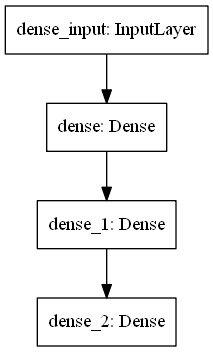

In [24]:
plot_model(model)

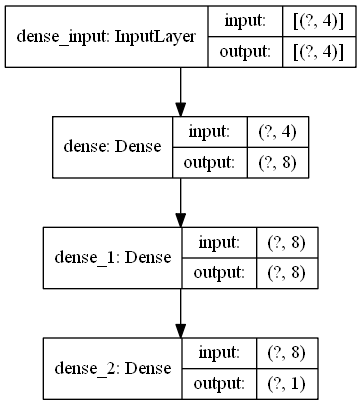

In [25]:
plot_model(model,show_layer_names=True, show_shapes=True)

### 모델 컴파일(훈련 준비 전단계)

In [26]:
from tensorflow.keras import optimizers

In [27]:
model.compile(loss='mean_squared_error', optimizer = optimizers.Adam(), metrics=['mean_squared_error','mean_absolute_error'])
#model.compile(loss="mean_squared_error", optimizers = "adam", metrics=["mean_squared_error","mean_absolute_error"])

#optimizer = keras.optimizers.RMSprop(0.001)
# optimizer = keras.optimizers.Adam()
# model.compile(loss='mean_squared_error',
#                 optimizer=optimizer,
#                 metrics=['mean_absolute_error','mean_squared_error'])


In [28]:
from keras.callbacks import EarlyStopping, TensorBoard, ModelCheckpoint

Using TensorFlow backend.


In [29]:
from datetime import datetime

In [30]:
log_folder = datetime.now().strftime("%Y%m%d_%H%M%S")


In [38]:
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint

from datetime import datetime
import os

log_dirs = os.path.join("logs",log_folder)
log_dirs

'logs\\20191015_130508'

In [39]:
callback_list = [
    TensorBoard(log_dir = log_dirs),
    EarlyStopping(monitor="val_loss", patience=10), 
    ModelCheckpoint(filepath="./model_r_weights.h5", monitor="val_loss", verbose=1, save_best_only=True)   
]

In [40]:
model.fit(x=trainingData_features,
          y=trainingData_label,
          batch_size=32,
          epochs=2000,
          validation_split=0.2,
          callbacks=callback_list)

W1015 13:06:25.839781  8824 training.py:504] Falling back from v2 loop because of error: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'>


Train on 68 samples, validate on 18 samples
Epoch 1/2000
64/68 [===========================>..] - ETA: 0s - loss: 1974514.3750 - mean_squared_error: 1974514.3750 - mean_absolute_error: 1118.0924
Epoch 00001: val_loss improved from inf to 1949232.00000, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 3ms/sample - loss: 1926542.6029 - mean_squared_error: 1926542.6250 - mean_absolute_error: 1107.9546 - val_loss: 1949232.0000 - val_mean_squared_error: 1949232.0000 - val_mean_absolute_error: 1161.0555
Epoch 2/2000
32/68 [=============>................] - ETA: 0s - loss: 1627570.0000 - mean_squared_error: 1627570.0000 - mean_absolute_error: 1099.5924
Epoch 00002: val_loss did not improve from 1949232.00000
68/68 [==============================] - 0s 290us/sample - loss: 1926540.6471 - mean_squared_error: 1926540.7500 - mean_absolute_error: 1107.9542 - val_loss: 1949232.0000 - val_mean_squared_error: 1949232.0000 - val_mean_absolute_error: 1161.0555
Epoch 3/20

32/68 [=============>................] - ETA: 0s - loss: 2545361.2500 - mean_squared_error: 2545361.2500 - mean_absolute_error: 1235.8325
Epoch 00018: val_loss improved from 1949041.50000 to 1949008.87500, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 410us/sample - loss: 1926380.3088 - mean_squared_error: 1926380.3750 - mean_absolute_error: 1107.9117 - val_loss: 1949008.8750 - val_mean_squared_error: 1949008.8750 - val_mean_absolute_error: 1160.9857
Epoch 19/2000
32/68 [=============>................] - ETA: 0s - loss: 2221505.0000 - mean_squared_error: 2221505.0000 - mean_absolute_error: 1108.4489
Epoch 00019: val_loss improved from 1949008.87500 to 1948962.87500, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 323us/sample - loss: 1926355.2941 - mean_squared_error: 1926355.2500 - mean_absolute_error: 1107.9053 - val_loss: 1948962.8750 - val_mean_squared_error: 1948962.8750 - val_mean_absolute_error: 1160.9702
Epoch 

32/68 [=============>................] - ETA: 0s - loss: 1733982.7500 - mean_squared_error: 1733982.7500 - mean_absolute_error: 1047.4869
Epoch 00034: val_loss improved from 1947756.87500 to 1947662.87500, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 308us/sample - loss: 1925149.4412 - mean_squared_error: 1925149.3750 - mean_absolute_error: 1107.2828 - val_loss: 1947662.8750 - val_mean_squared_error: 1947662.8750 - val_mean_absolute_error: 1160.3549
Epoch 35/2000
32/68 [=============>................] - ETA: 0s - loss: 1818385.5000 - mean_squared_error: 1818385.5000 - mean_absolute_error: 1068.4119
Epoch 00035: val_loss improved from 1947662.87500 to 1947567.37500, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 337us/sample - loss: 1925056.7353 - mean_squared_error: 1925056.8750 - mean_absolute_error: 1107.2350 - val_loss: 1947567.3750 - val_mean_squared_error: 1947567.3750 - val_mean_absolute_error: 1160.3097
Epoch 

32/68 [=============>................] - ETA: 0s - loss: 2223982.5000 - mean_squared_error: 2223982.5000 - mean_absolute_error: 1207.6962
Epoch 00050: val_loss improved from 1946091.75000 to 1945971.50000, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 323us/sample - loss: 1923546.9338 - mean_squared_error: 1923547.0000 - mean_absolute_error: 1106.4656 - val_loss: 1945971.5000 - val_mean_squared_error: 1945971.5000 - val_mean_absolute_error: 1159.5649
Epoch 51/2000
32/68 [=============>................] - ETA: 0s - loss: 1736656.7500 - mean_squared_error: 1736656.7500 - mean_absolute_error: 1065.1121
Epoch 00051: val_loss improved from 1945971.50000 to 1945850.62500, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 308us/sample - loss: 1923431.3713 - mean_squared_error: 1923431.3750 - mean_absolute_error: 1106.4083 - val_loss: 1945850.6250 - val_mean_squared_error: 1945850.6250 - val_mean_absolute_error: 1159.5088
Epoch 

32/68 [=============>................] - ETA: 0s - loss: 1505279.3750 - mean_squared_error: 1505279.3750 - mean_absolute_error: 938.2583
Epoch 00066: val_loss improved from 1943790.25000 to 1943607.50000, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 337us/sample - loss: 1921353.0588 - mean_squared_error: 1921353.1250 - mean_absolute_error: 1105.3779 - val_loss: 1943607.5000 - val_mean_squared_error: 1943607.5000 - val_mean_absolute_error: 1158.4858
Epoch 67/2000
32/68 [=============>................] - ETA: 0s - loss: 1164614.2500 - mean_squared_error: 1164614.2500 - mean_absolute_error: 906.8444
Epoch 00067: val_loss improved from 1943607.50000 to 1943419.12500, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 396us/sample - loss: 1921179.6471 - mean_squared_error: 1921179.6250 - mean_absolute_error: 1105.2942 - val_loss: 1943419.1250 - val_mean_squared_error: 1943419.1250 - val_mean_absolute_error: 1158.3999
Epoch 68

32/68 [=============>................] - ETA: 0s - loss: 2033081.1250 - mean_squared_error: 2033081.1250 - mean_absolute_error: 1151.6749
Epoch 00082: val_loss improved from 1939982.87500 to 1939685.37500, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 338us/sample - loss: 1917765.8327 - mean_squared_error: 1917765.8750 - mean_absolute_error: 1103.5947 - val_loss: 1939685.3750 - val_mean_squared_error: 1939685.3750 - val_mean_absolute_error: 1156.7010
Epoch 83/2000
32/68 [=============>................] - ETA: 0s - loss: 2243919.0000 - mean_squared_error: 2243919.0000 - mean_absolute_error: 1163.9440
Epoch 00083: val_loss improved from 1939685.37500 to 1939378.62500, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 294us/sample - loss: 1917480.4265 - mean_squared_error: 1917480.5000 - mean_absolute_error: 1103.4563 - val_loss: 1939378.6250 - val_mean_squared_error: 1939378.6250 - val_mean_absolute_error: 1156.5616
Epoch 

32/68 [=============>................] - ETA: 0s - loss: 1831496.5000 - mean_squared_error: 1831496.5000 - mean_absolute_error: 1110.1417
Epoch 00098: val_loss improved from 1933879.37500 to 1933391.37500, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 351us/sample - loss: 1911998.7941 - mean_squared_error: 1911998.8750 - mean_absolute_error: 1100.7468 - val_loss: 1933391.3750 - val_mean_squared_error: 1933391.3750 - val_mean_absolute_error: 1153.8452
Epoch 99/2000
32/68 [=============>................] - ETA: 0s - loss: 2332427.5000 - mean_squared_error: 2332427.5000 - mean_absolute_error: 1186.8704
Epoch 00099: val_loss improved from 1933391.37500 to 1932896.87500, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 323us/sample - loss: 1911542.2206 - mean_squared_error: 1911542.2500 - mean_absolute_error: 1100.5187 - val_loss: 1932896.8750 - val_mean_squared_error: 1932896.8750 - val_mean_absolute_error: 1153.6212
Epoch 

32/68 [=============>................] - ETA: 0s - loss: 1995514.7500 - mean_squared_error: 1995514.7500 - mean_absolute_error: 1072.9760
Epoch 00114: val_loss improved from 1924281.37500 to 1923570.62500, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 293us/sample - loss: 1902955.7794 - mean_squared_error: 1902955.7500 - mean_absolute_error: 1096.2772 - val_loss: 1923570.6250 - val_mean_squared_error: 1923570.6250 - val_mean_absolute_error: 1149.3872
Epoch 115/2000
32/68 [=============>................] - ETA: 0s - loss: 2234631.2500 - mean_squared_error: 2234631.2500 - mean_absolute_error: 1236.7727
Epoch 00115: val_loss improved from 1923570.62500 to 1922829.75000, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 367us/sample - loss: 1902296.0515 - mean_squared_error: 1902296.0000 - mean_absolute_error: 1095.9421 - val_loss: 1922829.7500 - val_mean_squared_error: 1922829.7500 - val_mean_absolute_error: 1149.0500
Epoch

32/68 [=============>................] - ETA: 0s - loss: 1586369.1250 - mean_squared_error: 1586369.1250 - mean_absolute_error: 1016.6535
Epoch 00130: val_loss improved from 1911026.50000 to 1910082.50000, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 352us/sample - loss: 1890529.5441 - mean_squared_error: 1890529.6250 - mean_absolute_error: 1090.2233 - val_loss: 1910082.5000 - val_mean_squared_error: 1910082.5000 - val_mean_absolute_error: 1143.2576
Epoch 131/2000
32/68 [=============>................] - ETA: 0s - loss: 2234093.5000 - mean_squared_error: 2234093.5000 - mean_absolute_error: 1218.0608
Epoch 00131: val_loss improved from 1910082.50000 to 1909118.62500, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 308us/sample - loss: 1889664.4706 - mean_squared_error: 1889664.5000 - mean_absolute_error: 1089.8057 - val_loss: 1909118.6250 - val_mean_squared_error: 1909118.6250 - val_mean_absolute_error: 1142.8193
Epoch

32/68 [=============>................] - ETA: 0s - loss: 2071993.5000 - mean_squared_error: 2071993.5000 - mean_absolute_error: 1127.0168
Epoch 00146: val_loss improved from 1893538.87500 to 1892300.00000, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 323us/sample - loss: 1874193.7500 - mean_squared_error: 1874193.7500 - mean_absolute_error: 1082.5409 - val_loss: 1892300.0000 - val_mean_squared_error: 1892300.0000 - val_mean_absolute_error: 1135.9429
Epoch 147/2000
32/68 [=============>................] - ETA: 0s - loss: 1453033.0000 - mean_squared_error: 1453033.0000 - mean_absolute_error: 991.1656
Epoch 00147: val_loss improved from 1892300.00000 to 1891067.50000, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 542us/sample - loss: 1873013.3088 - mean_squared_error: 1873013.2500 - mean_absolute_error: 1082.0054 - val_loss: 1891067.5000 - val_mean_squared_error: 1891067.5000 - val_mean_absolute_error: 1135.4478
Epoch 

32/68 [=============>................] - ETA: 0s - loss: 2498010.5000 - mean_squared_error: 2498010.5000 - mean_absolute_error: 1332.4260
Epoch 00162: val_loss improved from 1872317.37500 to 1870854.87500, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 308us/sample - loss: 1854462.1746 - mean_squared_error: 1854462.1250 - mean_absolute_error: 1073.2037 - val_loss: 1870854.8750 - val_mean_squared_error: 1870854.8750 - val_mean_absolute_error: 1127.2728
Epoch 163/2000
32/68 [=============>................] - ETA: 0s - loss: 1251381.5000 - mean_squared_error: 1251381.5000 - mean_absolute_error: 966.1696
Epoch 00163: val_loss improved from 1870854.87500 to 1869417.37500, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 323us/sample - loss: 1853043.9485 - mean_squared_error: 1853044.0000 - mean_absolute_error: 1072.5526 - val_loss: 1869417.3750 - val_mean_squared_error: 1869417.3750 - val_mean_absolute_error: 1126.6880
Epoch 

32/68 [=============>................] - ETA: 0s - loss: 2012347.8750 - mean_squared_error: 2012347.8750 - mean_absolute_error: 1156.3082
Epoch 00178: val_loss improved from 1847005.75000 to 1845244.50000, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 367us/sample - loss: 1830865.1507 - mean_squared_error: 1830865.0000 - mean_absolute_error: 1061.9470 - val_loss: 1845244.5000 - val_mean_squared_error: 1845244.5000 - val_mean_absolute_error: 1117.6609
Epoch 179/2000
32/68 [=============>................] - ETA: 0s - loss: 2336024.7500 - mean_squared_error: 2336024.7500 - mean_absolute_error: 1223.7264
Epoch 00179: val_loss improved from 1845244.50000 to 1843500.50000, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 367us/sample - loss: 1829254.9779 - mean_squared_error: 1829255.0000 - mean_absolute_error: 1061.1537 - val_loss: 1843500.5000 - val_mean_squared_error: 1843500.5000 - val_mean_absolute_error: 1117.0383
Epoch

32/68 [=============>................] - ETA: 0s - loss: 1845123.0000 - mean_squared_error: 1845123.0000 - mean_absolute_error: 1114.8409
Epoch 00194: val_loss improved from 1816646.12500 to 1814580.00000, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 338us/sample - loss: 1802690.3346 - mean_squared_error: 1802690.3750 - mean_absolute_error: 1048.5485 - val_loss: 1814580.0000 - val_mean_squared_error: 1814580.0000 - val_mean_absolute_error: 1106.6455
Epoch 195/2000
32/68 [=============>................] - ETA: 0s - loss: 2140065.0000 - mean_squared_error: 2140065.0000 - mean_absolute_error: 1033.5283
Epoch 00195: val_loss improved from 1814580.00000 to 1812540.75000, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 367us/sample - loss: 1800743.9485 - mean_squared_error: 1800744.0000 - mean_absolute_error: 1047.6368 - val_loss: 1812540.7500 - val_mean_squared_error: 1812540.7500 - val_mean_absolute_error: 1105.9073
Epoch

32/68 [=============>................] - ETA: 0s - loss: 1383335.7500 - mean_squared_error: 1383335.7500 - mean_absolute_error: 1013.1583
Epoch 00210: val_loss improved from 1781464.50000 to 1779104.50000, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 323us/sample - loss: 1770055.9412 - mean_squared_error: 1770056.0000 - mean_absolute_error: 1033.0093 - val_loss: 1779104.5000 - val_mean_squared_error: 1779104.5000 - val_mean_absolute_error: 1094.1528
Epoch 211/2000
32/68 [=============>................] - ETA: 0s - loss: 1204915.0000 - mean_squared_error: 1204915.0000 - mean_absolute_error: 945.0380
Epoch 00211: val_loss improved from 1779104.50000 to 1776728.12500, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 381us/sample - loss: 1767888.1471 - mean_squared_error: 1767888.1250 - mean_absolute_error: 1031.9857 - val_loss: 1776728.1250 - val_mean_squared_error: 1776728.1250 - val_mean_absolute_error: 1093.4094
Epoch 

32/68 [=============>................] - ETA: 0s - loss: 2632435.5000 - mean_squared_error: 2632435.5000 - mean_absolute_error: 1265.0787
Epoch 00226: val_loss improved from 1742343.37500 to 1739546.75000, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 308us/sample - loss: 1734005.6507 - mean_squared_error: 1734005.6250 - mean_absolute_error: 1015.4337 - val_loss: 1739546.7500 - val_mean_squared_error: 1739546.7500 - val_mean_absolute_error: 1082.4226
Epoch 227/2000
32/68 [=============>................] - ETA: 0s - loss: 1072005.5000 - mean_squared_error: 1072005.5000 - mean_absolute_error: 814.7993
Epoch 00227: val_loss improved from 1739546.75000 to 1736808.00000, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 309us/sample - loss: 1731277.6765 - mean_squared_error: 1731277.6250 - mean_absolute_error: 1014.1854 - val_loss: 1736808.0000 - val_mean_squared_error: 1736808.0000 - val_mean_absolute_error: 1081.7018
Epoch 

32/68 [=============>................] - ETA: 0s - loss: 1039121.6250 - mean_squared_error: 1039121.6250 - mean_absolute_error: 823.3090
Epoch 00242: val_loss improved from 1697067.25000 to 1694024.87500, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 411us/sample - loss: 1692235.2188 - mean_squared_error: 1692235.1250 - mean_absolute_error: 994.8034 - val_loss: 1694024.8750 - val_mean_squared_error: 1694024.8750 - val_mean_absolute_error: 1070.2808
Epoch 243/2000
32/68 [=============>................] - ETA: 0s - loss: 1104142.7500 - mean_squared_error: 1104142.7500 - mean_absolute_error: 853.8041
Epoch 00243: val_loss improved from 1694024.87500 to 1691082.87500, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 323us/sample - loss: 1689418.6765 - mean_squared_error: 1689418.7500 - mean_absolute_error: 993.3970 - val_loss: 1691082.8750 - val_mean_squared_error: 1691082.8750 - val_mean_absolute_error: 1069.4856
Epoch 244

68/68 [==============================] - 0s 411us/sample - loss: 1646897.0441 - mean_squared_error: 1646897.0000 - mean_absolute_error: 972.4129 - val_loss: 1644424.5000 - val_mean_squared_error: 1644424.5000 - val_mean_absolute_error: 1056.6914
Epoch 259/2000
32/68 [=============>................] - ETA: 0s - loss: 1571815.0000 - mean_squared_error: 1571815.0000 - mean_absolute_error: 935.7847
Epoch 00259: val_loss improved from 1644424.50000 to 1641248.75000, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 308us/sample - loss: 1644015.0735 - mean_squared_error: 1644015.0000 - mean_absolute_error: 971.0324 - val_loss: 1641248.7500 - val_mean_squared_error: 1641248.7500 - val_mean_absolute_error: 1055.8069
Epoch 260/2000
32/68 [=============>................] - ETA: 0s - loss: 2257988.7500 - mean_squared_error: 2257988.7500 - mean_absolute_error: 1158.5856
Epoch 00260: val_loss improved from 1641248.75000 to 1638074.87500, saving model to ./model_r_weig

Epoch 275/2000
32/68 [=============>................] - ETA: 0s - loss: 2099467.0000 - mean_squared_error: 2099467.0000 - mean_absolute_error: 1111.4624
Epoch 00275: val_loss improved from 1595201.37500 to 1591942.75000, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 279us/sample - loss: 1599104.9853 - mean_squared_error: 1599105.0000 - mean_absolute_error: 948.9233 - val_loss: 1591942.7500 - val_mean_squared_error: 1591942.7500 - val_mean_absolute_error: 1041.9210
Epoch 276/2000
32/68 [=============>................] - ETA: 0s - loss: 647667.7500 - mean_squared_error: 647667.7500 - mean_absolute_error: 643.3606
Epoch 00276: val_loss improved from 1591942.75000 to 1588621.50000, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 323us/sample - loss: 1596002.8088 - mean_squared_error: 1596002.8750 - mean_absolute_error: 947.4904 - val_loss: 1588621.5000 - val_mean_squared_error: 1588621.5000 - val_mean_absolute_error: 1040.

32/68 [=============>................] - ETA: 0s - loss: 1385995.7500 - mean_squared_error: 1385995.7500 - mean_absolute_error: 847.9457
Epoch 00291: val_loss improved from 1540137.12500 to 1536637.50000, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 337us/sample - loss: 1548949.3088 - mean_squared_error: 1548949.2500 - mean_absolute_error: 923.5233 - val_loss: 1536637.5000 - val_mean_squared_error: 1536637.5000 - val_mean_absolute_error: 1025.8500
Epoch 292/2000
32/68 [=============>................] - ETA: 0s - loss: 2342827.0000 - mean_squared_error: 2342827.0000 - mean_absolute_error: 1148.7041
Epoch 00292: val_loss improved from 1536637.50000 to 1533100.50000, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 293us/sample - loss: 1545902.6838 - mean_squared_error: 1545902.7500 - mean_absolute_error: 921.9323 - val_loss: 1533100.5000 - val_mean_squared_error: 1533100.5000 - val_mean_absolute_error: 1024.8027
Epoch 29

68/68 [==============================] - 0s 382us/sample - loss: 1496654.1654 - mean_squared_error: 1496654.1250 - mean_absolute_error: 896.9384 - val_loss: 1478629.5000 - val_mean_squared_error: 1478629.5000 - val_mean_absolute_error: 1008.3230
Epoch 308/2000
32/68 [=============>................] - ETA: 0s - loss: 1439283.7500 - mean_squared_error: 1439283.7500 - mean_absolute_error: 839.8507
Epoch 00308: val_loss improved from 1478629.50000 to 1475235.12500, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 308us/sample - loss: 1493380.7574 - mean_squared_error: 1493380.7500 - mean_absolute_error: 895.3622 - val_loss: 1475235.1250 - val_mean_squared_error: 1475235.1250 - val_mean_absolute_error: 1007.2794
Epoch 309/2000
32/68 [=============>................] - ETA: 0s - loss: 1516799.5000 - mean_squared_error: 1516799.5000 - mean_absolute_error: 872.5702
Epoch 00309: val_loss improved from 1475235.12500 to 1471727.62500, saving model to ./model_r_weigh

Epoch 324/2000
32/68 [=============>................] - ETA: 0s - loss: 1891363.0000 - mean_squared_error: 1891363.0000 - mean_absolute_error: 903.3588
Epoch 00324: val_loss improved from 1419636.50000 to 1415456.62500, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 337us/sample - loss: 1440296.6507 - mean_squared_error: 1440296.7500 - mean_absolute_error: 868.7652 - val_loss: 1415456.6250 - val_mean_squared_error: 1415456.6250 - val_mean_absolute_error: 988.4658
Epoch 325/2000
32/68 [=============>................] - ETA: 0s - loss: 1606246.5000 - mean_squared_error: 1606246.5000 - mean_absolute_error: 1011.1412
Epoch 00325: val_loss improved from 1415456.62500 to 1411480.50000, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 396us/sample - loss: 1436690.8346 - mean_squared_error: 1436690.8750 - mean_absolute_error: 866.9833 - val_loss: 1411480.5000 - val_mean_squared_error: 1411480.5000 - val_mean_absolute_error: 987.

68/68 [==============================] - 0s 352us/sample - loss: 1386178.1544 - mean_squared_error: 1386178.1250 - mean_absolute_error: 841.1903 - val_loss: 1355315.7500 - val_mean_squared_error: 1355315.7500 - val_mean_absolute_error: 968.7691
Epoch 341/2000
32/68 [=============>................] - ETA: 0s - loss: 1275118.3750 - mean_squared_error: 1275118.3750 - mean_absolute_error: 813.0416
Epoch 00341: val_loss improved from 1355315.75000 to 1351627.12500, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 337us/sample - loss: 1382874.4779 - mean_squared_error: 1382874.6250 - mean_absolute_error: 839.4738 - val_loss: 1351627.1250 - val_mean_squared_error: 1351627.1250 - val_mean_absolute_error: 967.5311
Epoch 342/2000
32/68 [=============>................] - ETA: 0s - loss: 2005258.0000 - mean_squared_error: 2005258.0000 - mean_absolute_error: 1050.6917
Epoch 00342: val_loss improved from 1351627.12500 to 1347891.37500, saving model to ./model_r_weight

Epoch 357/2000
32/68 [=============>................] - ETA: 0s - loss: 1545881.7500 - mean_squared_error: 1545881.7500 - mean_absolute_error: 846.5477
Epoch 00357: val_loss improved from 1297530.25000 to 1294338.75000, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 470us/sample - loss: 1331831.3529 - mean_squared_error: 1331831.2500 - mean_absolute_error: 812.6422 - val_loss: 1294338.7500 - val_mean_squared_error: 1294338.7500 - val_mean_absolute_error: 947.8268
Epoch 358/2000
32/68 [=============>................] - ETA: 0s - loss: 1947905.2500 - mean_squared_error: 1947905.2500 - mean_absolute_error: 950.7415
Epoch 00358: val_loss improved from 1294338.75000 to 1291197.50000, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 352us/sample - loss: 1329062.7206 - mean_squared_error: 1329062.7500 - mean_absolute_error: 811.1569 - val_loss: 1291197.5000 - val_mean_squared_error: 1291197.5000 - val_mean_absolute_error: 946.7

68/68 [==============================] - 0s 381us/sample - loss: 1283544.6765 - mean_squared_error: 1283544.7500 - mean_absolute_error: 788.2603 - val_loss: 1239210.6250 - val_mean_squared_error: 1239210.6250 - val_mean_absolute_error: 927.9460
Epoch 374/2000
32/68 [=============>................] - ETA: 0s - loss: 1278041.7500 - mean_squared_error: 1278041.7500 - mean_absolute_error: 799.8888
Epoch 00374: val_loss improved from 1239210.62500 to 1235604.50000, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 323us/sample - loss: 1280395.2794 - mean_squared_error: 1280395.2500 - mean_absolute_error: 786.7535 - val_loss: 1235604.5000 - val_mean_squared_error: 1235604.5000 - val_mean_absolute_error: 926.6080
Epoch 375/2000
32/68 [=============>................] - ETA: 0s - loss: 1413506.5000 - mean_squared_error: 1413506.5000 - mean_absolute_error: 828.8507
Epoch 00375: val_loss improved from 1235604.50000 to 1231908.00000, saving model to ./model_r_weights

Epoch 390/2000
32/68 [=============>................] - ETA: 0s - loss: 1181013.5000 - mean_squared_error: 1181013.5000 - mean_absolute_error: 717.1179
Epoch 00390: val_loss improved from 1179469.62500 to 1175897.87500, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 337us/sample - loss: 1228327.9632 - mean_squared_error: 1228328.0000 - mean_absolute_error: 761.2686 - val_loss: 1175897.8750 - val_mean_squared_error: 1175897.8750 - val_mean_absolute_error: 908.9960
Epoch 391/2000
32/68 [=============>................] - ETA: 0s - loss: 1877346.2500 - mean_squared_error: 1877346.2500 - mean_absolute_error: 935.3851
Epoch 00391: val_loss improved from 1175897.87500 to 1172379.12500, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 367us/sample - loss: 1225396.9375 - mean_squared_error: 1225397.0000 - mean_absolute_error: 759.7251 - val_loss: 1172379.1250 - val_mean_squared_error: 1172379.1250 - val_mean_absolute_error: 907.9

68/68 [==============================] - 0s 308us/sample - loss: 1178052.6250 - mean_squared_error: 1178052.6250 - mean_absolute_error: 738.7690 - val_loss: 1117332.1250 - val_mean_squared_error: 1117332.1250 - val_mean_absolute_error: 890.8279
Epoch 407/2000
32/68 [=============>................] - ETA: 0s - loss: 747521.7500 - mean_squared_error: 747521.7500 - mean_absolute_error: 558.0349
Epoch 00407: val_loss improved from 1117332.12500 to 1113681.62500, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 323us/sample - loss: 1174676.1140 - mean_squared_error: 1174676.0000 - mean_absolute_error: 737.4386 - val_loss: 1113681.6250 - val_mean_squared_error: 1113681.6250 - val_mean_absolute_error: 889.6560
Epoch 408/2000
32/68 [=============>................] - ETA: 0s - loss: 853566.9375 - mean_squared_error: 853566.9375 - mean_absolute_error: 641.8600
Epoch 00408: val_loss improved from 1113681.62500 to 1110139.50000, saving model to ./model_r_weights.h5


Epoch 423/2000
32/68 [=============>................] - ETA: 0s - loss: 536893.2500 - mean_squared_error: 536893.2500 - mean_absolute_error: 531.7038
Epoch 00423: val_loss improved from 1063351.37500 to 1060296.87500, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 308us/sample - loss: 1128867.9154 - mean_squared_error: 1128868.0000 - mean_absolute_error: 719.4883 - val_loss: 1060296.8750 - val_mean_squared_error: 1060296.8750 - val_mean_absolute_error: 875.3064
Epoch 424/2000
32/68 [=============>................] - ETA: 0s - loss: 822155.2500 - mean_squared_error: 822155.2500 - mean_absolute_error: 579.1729
Epoch 00424: val_loss improved from 1060296.87500 to 1057244.62500, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 323us/sample - loss: 1126237.2316 - mean_squared_error: 1126237.2500 - mean_absolute_error: 718.3480 - val_loss: 1057244.6250 - val_mean_squared_error: 1057244.6250 - val_mean_absolute_error: 874.5823


Epoch 440/2000
32/68 [=============>................] - ETA: 0s - loss: 954411.6250 - mean_squared_error: 954411.6250 - mean_absolute_error: 628.1609
Epoch 00440: val_loss improved from 1014580.68750 to 1011767.43750, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 367us/sample - loss: 1087940.1324 - mean_squared_error: 1087940.1250 - mean_absolute_error: 703.0795 - val_loss: 1011767.4375 - val_mean_squared_error: 1011767.4375 - val_mean_absolute_error: 863.3531
Epoch 441/2000
32/68 [=============>................] - ETA: 0s - loss: 1310263.1250 - mean_squared_error: 1310263.1250 - mean_absolute_error: 783.9760
Epoch 00441: val_loss improved from 1011767.43750 to 1008640.56250, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 309us/sample - loss: 1085691.4301 - mean_squared_error: 1085691.5000 - mean_absolute_error: 702.2384 - val_loss: 1008640.5625 - val_mean_squared_error: 1008640.5625 - val_mean_absolute_error: 862.565

Epoch 457/2000
32/68 [=============>................] - ETA: 0s - loss: 1184814.2500 - mean_squared_error: 1184814.2500 - mean_absolute_error: 719.6156
Epoch 00457: val_loss improved from 967523.87500 to 964852.56250, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 308us/sample - loss: 1049211.8536 - mean_squared_error: 1049211.8750 - mean_absolute_error: 689.6367 - val_loss: 964852.5625 - val_mean_squared_error: 964852.5625 - val_mean_absolute_error: 850.9110
Epoch 458/2000
32/68 [=============>................] - ETA: 0s - loss: 376774.0938 - mean_squared_error: 376774.0938 - mean_absolute_error: 453.4638
Epoch 00458: val_loss improved from 964852.56250 to 962437.12500, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 308us/sample - loss: 1046854.7757 - mean_squared_error: 1046854.8125 - mean_absolute_error: 688.8467 - val_loss: 962437.1250 - val_mean_squared_error: 962437.1250 - val_mean_absolute_error: 850.2149
Epoch 

Epoch 00473: val_loss improved from 927901.25000 to 925426.68750, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 323us/sample - loss: 1016844.7748 - mean_squared_error: 1016844.8125 - mean_absolute_error: 680.1036 - val_loss: 925426.6875 - val_mean_squared_error: 925426.6875 - val_mean_absolute_error: 839.3246
Epoch 474/2000
32/68 [=============>................] - ETA: 0s - loss: 1012396.7500 - mean_squared_error: 1012396.7500 - mean_absolute_error: 682.2540
Epoch 00474: val_loss improved from 925426.68750 to 923012.25000, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 366us/sample - loss: 1014762.1838 - mean_squared_error: 1014762.2500 - mean_absolute_error: 679.6477 - val_loss: 923012.2500 - val_mean_squared_error: 923012.2500 - val_mean_absolute_error: 838.5926
Epoch 475/2000
32/68 [=============>................] - ETA: 0s - loss: 974621.0625 - mean_squared_error: 974621.0625 - mean_absolute_error: 655.0836
Epoch 

Epoch 490/2000
32/68 [=============>................] - ETA: 0s - loss: 1562219.5000 - mean_squared_error: 1562219.5000 - mean_absolute_error: 852.3404
Epoch 00490: val_loss improved from 889381.81250 to 887529.50000, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 323us/sample - loss: 986012.9430 - mean_squared_error: 986012.9375 - mean_absolute_error: 673.3656 - val_loss: 887529.5000 - val_mean_squared_error: 887529.5000 - val_mean_absolute_error: 827.2068
Epoch 491/2000
32/68 [=============>................] - ETA: 0s - loss: 940358.5625 - mean_squared_error: 940358.5625 - mean_absolute_error: 681.9492
Epoch 00491: val_loss improved from 887529.50000 to 885667.00000, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 353us/sample - loss: 984374.2426 - mean_squared_error: 984374.2500 - mean_absolute_error: 672.9421 - val_loss: 885667.0000 - val_mean_squared_error: 885667.0000 - val_mean_absolute_error: 826.5758
Epoch 492/

Epoch 507/2000
32/68 [=============>................] - ETA: 0s - loss: 557658.3750 - mean_squared_error: 557658.3750 - mean_absolute_error: 479.9166
Epoch 00507: val_loss improved from 852676.43750 to 850594.18750, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 337us/sample - loss: 956602.2206 - mean_squared_error: 956602.2500 - mean_absolute_error: 666.4684 - val_loss: 850594.1875 - val_mean_squared_error: 850594.1875 - val_mean_absolute_error: 814.3746
Epoch 508/2000
32/68 [=============>................] - ETA: 0s - loss: 928158.6875 - mean_squared_error: 928158.6875 - mean_absolute_error: 688.1647
Epoch 00508: val_loss improved from 850594.18750 to 848301.50000, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 337us/sample - loss: 955095.7491 - mean_squared_error: 955095.7500 - mean_absolute_error: 666.0731 - val_loss: 848301.5000 - val_mean_squared_error: 848301.5000 - val_mean_absolute_error: 813.5363
Epoch 509/20

Epoch 524/2000
32/68 [=============>................] - ETA: 0s - loss: 942509.4375 - mean_squared_error: 942509.4375 - mean_absolute_error: 647.2900
Epoch 00524: val_loss improved from 818645.75000 to 816918.62500, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 367us/sample - loss: 930309.1838 - mean_squared_error: 930309.2500 - mean_absolute_error: 660.1776 - val_loss: 816918.6250 - val_mean_squared_error: 816918.6250 - val_mean_absolute_error: 801.4612
Epoch 525/2000
32/68 [=============>................] - ETA: 0s - loss: 793011.0000 - mean_squared_error: 793011.0000 - mean_absolute_error: 623.7509
Epoch 00525: val_loss improved from 816918.62500 to 815197.37500, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 337us/sample - loss: 929023.7206 - mean_squared_error: 929023.6875 - mean_absolute_error: 659.9127 - val_loss: 815197.3750 - val_mean_squared_error: 815197.3750 - val_mean_absolute_error: 800.7629
Epoch 526/20

Epoch 541/2000
32/68 [=============>................] - ETA: 0s - loss: 949263.6250 - mean_squared_error: 949263.6250 - mean_absolute_error: 698.4785
Epoch 00541: val_loss improved from 789617.75000 to 787951.37500, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 323us/sample - loss: 907933.3300 - mean_squared_error: 907933.3125 - mean_absolute_error: 655.5736 - val_loss: 787951.3750 - val_mean_squared_error: 787951.3750 - val_mean_absolute_error: 789.1354
Epoch 542/2000
32/68 [=============>................] - ETA: 0s - loss: 1129284.5000 - mean_squared_error: 1129284.5000 - mean_absolute_error: 712.4050
Epoch 00542: val_loss improved from 787951.37500 to 786422.31250, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 309us/sample - loss: 906648.5947 - mean_squared_error: 906648.5625 - mean_absolute_error: 655.3328 - val_loss: 786422.3125 - val_mean_squared_error: 786422.3125 - val_mean_absolute_error: 788.4544
Epoch 543/

68/68 [==============================] - 0s 397us/sample - loss: 889323.9899 - mean_squared_error: 889324.0000 - mean_absolute_error: 652.0446 - val_loss: 764052.8125 - val_mean_squared_error: 764052.8125 - val_mean_absolute_error: 778.0153
Epoch 558/2000
32/68 [=============>................] - ETA: 0s - loss: 1013771.0000 - mean_squared_error: 1013771.0000 - mean_absolute_error: 750.6970
Epoch 00558: val_loss improved from 764052.81250 to 762735.12500, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 308us/sample - loss: 888365.1360 - mean_squared_error: 888365.1250 - mean_absolute_error: 651.8354 - val_loss: 762735.1250 - val_mean_squared_error: 762735.1250 - val_mean_absolute_error: 777.3694
Epoch 559/2000
32/68 [=============>................] - ETA: 0s - loss: 1052365.8750 - mean_squared_error: 1052365.8750 - mean_absolute_error: 727.1127
Epoch 00559: val_loss improved from 762735.12500 to 761530.12500, saving model to ./model_r_weights.h5
68/68 [=

32/68 [=============>................] - ETA: 0s - loss: 963725.0625 - mean_squared_error: 963725.0625 - mean_absolute_error: 656.8855
Epoch 00574: val_loss improved from 744757.12500 to 743615.50000, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 441us/sample - loss: 873207.2757 - mean_squared_error: 873207.3125 - mean_absolute_error: 649.1009 - val_loss: 743615.5000 - val_mean_squared_error: 743615.5000 - val_mean_absolute_error: 770.2490
Epoch 575/2000
32/68 [=============>................] - ETA: 0s - loss: 1178529.6250 - mean_squared_error: 1178529.6250 - mean_absolute_error: 767.9017
Epoch 00575: val_loss improved from 743615.50000 to 742477.75000, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 323us/sample - loss: 872328.6397 - mean_squared_error: 872328.6250 - mean_absolute_error: 648.9069 - val_loss: 742477.7500 - val_mean_squared_error: 742477.7500 - val_mean_absolute_error: 769.8272
Epoch 576/2000
32/68 [===

Epoch 591/2000
32/68 [=============>................] - ETA: 0s - loss: 760499.6875 - mean_squared_error: 760499.6875 - mean_absolute_error: 622.8540
Epoch 00591: val_loss improved from 725297.68750 to 724359.56250, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 455us/sample - loss: 857932.0395 - mean_squared_error: 857932.0625 - mean_absolute_error: 647.3577 - val_loss: 724359.5625 - val_mean_squared_error: 724359.5625 - val_mean_absolute_error: 762.5266
Epoch 592/2000
32/68 [=============>................] - ETA: 0s - loss: 663074.2500 - mean_squared_error: 663074.2500 - mean_absolute_error: 602.8194
Epoch 00592: val_loss improved from 724359.56250 to 723310.93750, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 323us/sample - loss: 857110.7794 - mean_squared_error: 857110.7500 - mean_absolute_error: 647.2274 - val_loss: 723310.9375 - val_mean_squared_error: 723310.9375 - val_mean_absolute_error: 762.0776
Epoch 593/20

Epoch 608/2000
32/68 [=============>................] - ETA: 0s - loss: 761024.1250 - mean_squared_error: 761024.1250 - mean_absolute_error: 578.5296
Epoch 00608: val_loss improved from 705567.75000 to 704367.31250, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 279us/sample - loss: 842354.2794 - mean_squared_error: 842354.3125 - mean_absolute_error: 645.7006 - val_loss: 704367.3125 - val_mean_squared_error: 704367.3125 - val_mean_absolute_error: 753.9749
Epoch 609/2000
32/68 [=============>................] - ETA: 0s - loss: 528896.3125 - mean_squared_error: 528896.3125 - mean_absolute_error: 574.5845
Epoch 00609: val_loss improved from 704367.31250 to 703129.25000, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 367us/sample - loss: 841456.2812 - mean_squared_error: 841456.2500 - mean_absolute_error: 645.6520 - val_loss: 703129.2500 - val_mean_squared_error: 703129.2500 - val_mean_absolute_error: 753.4337
Epoch 610/20

Epoch 625/2000
32/68 [=============>................] - ETA: 0s - loss: 659426.8750 - mean_squared_error: 659426.8750 - mean_absolute_error: 546.7469
Epoch 00625: val_loss improved from 685217.50000 to 684218.68750, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 308us/sample - loss: 826749.5570 - mean_squared_error: 826749.5000 - mean_absolute_error: 644.1033 - val_loss: 684218.6875 - val_mean_squared_error: 684218.6875 - val_mean_absolute_error: 744.7896
Epoch 626/2000
32/68 [=============>................] - ETA: 0s - loss: 361444.5312 - mean_squared_error: 361444.5312 - mean_absolute_error: 478.1669
Epoch 00626: val_loss improved from 684218.68750 to 683289.25000, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 352us/sample - loss: 825909.6654 - mean_squared_error: 825909.6250 - mean_absolute_error: 643.9495 - val_loss: 683289.2500 - val_mean_squared_error: 683289.2500 - val_mean_absolute_error: 744.3130
Epoch 627/20

Epoch 642/2000
32/68 [=============>................] - ETA: 0s - loss: 875184.6250 - mean_squared_error: 875184.6250 - mean_absolute_error: 625.6884
Epoch 00642: val_loss improved from 669408.12500 to 668608.25000, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 322us/sample - loss: 813762.4761 - mean_squared_error: 813762.5000 - mean_absolute_error: 641.2388 - val_loss: 668608.2500 - val_mean_squared_error: 668608.2500 - val_mean_absolute_error: 736.6133
Epoch 643/2000
32/68 [=============>................] - ETA: 0s - loss: 705879.8125 - mean_squared_error: 705879.8125 - mean_absolute_error: 609.8964
Epoch 00643: val_loss improved from 668608.25000 to 667652.68750, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 733us/sample - loss: 813062.1618 - mean_squared_error: 813062.1875 - mean_absolute_error: 641.1117 - val_loss: 667652.6875 - val_mean_squared_error: 667652.6875 - val_mean_absolute_error: 736.1180
Epoch 644/20

Epoch 659/2000
32/68 [=============>................] - ETA: 0s - loss: 1007240.5000 - mean_squared_error: 1007240.5000 - mean_absolute_error: 719.4470
Epoch 00659: val_loss improved from 655392.18750 to 654729.00000, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 381us/sample - loss: 801631.0106 - mean_squared_error: 801631.0000 - mean_absolute_error: 637.6376 - val_loss: 654729.0000 - val_mean_squared_error: 654729.0000 - val_mean_absolute_error: 728.6458
Epoch 660/2000
32/68 [=============>................] - ETA: 0s - loss: 431590.9062 - mean_squared_error: 431590.9062 - mean_absolute_error: 551.1125
Epoch 00660: val_loss improved from 654729.00000 to 654054.75000, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 381us/sample - loss: 800938.6618 - mean_squared_error: 800938.6250 - mean_absolute_error: 637.3724 - val_loss: 654054.7500 - val_mean_squared_error: 654054.7500 - val_mean_absolute_error: 728.2356
Epoch 661/

Epoch 676/2000
32/68 [=============>................] - ETA: 0s - loss: 463287.7500 - mean_squared_error: 463287.7500 - mean_absolute_error: 547.5896
Epoch 00676: val_loss improved from 638557.25000 to 637683.81250, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 323us/sample - loss: 787633.8088 - mean_squared_error: 787633.8125 - mean_absolute_error: 634.2306 - val_loss: 637683.8125 - val_mean_squared_error: 637683.8125 - val_mean_absolute_error: 718.9268
Epoch 677/2000
32/68 [=============>................] - ETA: 0s - loss: 647915.1250 - mean_squared_error: 647915.1250 - mean_absolute_error: 542.2544
Epoch 00677: val_loss improved from 637683.81250 to 636731.25000, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 309us/sample - loss: 786885.0331 - mean_squared_error: 786885.0625 - mean_absolute_error: 634.0131 - val_loss: 636731.2500 - val_mean_squared_error: 636731.2500 - val_mean_absolute_error: 718.3650
Epoch 678/20

Epoch 693/2000
32/68 [=============>................] - ETA: 0s - loss: 475919.5938 - mean_squared_error: 475919.5938 - mean_absolute_error: 583.1784
Epoch 00693: val_loss improved from 626471.00000 to 625903.31250, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 323us/sample - loss: 776374.2050 - mean_squared_error: 776374.2500 - mean_absolute_error: 629.7870 - val_loss: 625903.3125 - val_mean_squared_error: 625903.3125 - val_mean_absolute_error: 711.3033
Epoch 694/2000
32/68 [=============>................] - ETA: 0s - loss: 693390.5625 - mean_squared_error: 693390.5625 - mean_absolute_error: 601.8636
Epoch 00694: val_loss improved from 625903.31250 to 625255.81250, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 308us/sample - loss: 775793.4412 - mean_squared_error: 775793.4375 - mean_absolute_error: 629.5288 - val_loss: 625255.8125 - val_mean_squared_error: 625255.8125 - val_mean_absolute_error: 710.8766
Epoch 695/20

Epoch 710/2000
32/68 [=============>................] - ETA: 0s - loss: 933865.2500 - mean_squared_error: 933865.2500 - mean_absolute_error: 707.4133
Epoch 00710: val_loss improved from 614492.87500 to 613423.81250, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 308us/sample - loss: 765056.2555 - mean_squared_error: 765056.2500 - mean_absolute_error: 625.6425 - val_loss: 613423.8125 - val_mean_squared_error: 613423.8125 - val_mean_absolute_error: 703.1328
Epoch 711/2000
32/68 [=============>................] - ETA: 0s - loss: 696752.5625 - mean_squared_error: 696752.5625 - mean_absolute_error: 665.6341
Epoch 00711: val_loss improved from 613423.81250 to 612538.00000, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 293us/sample - loss: 764151.6443 - mean_squared_error: 764151.6250 - mean_absolute_error: 625.4821 - val_loss: 612538.0000 - val_mean_squared_error: 612538.0000 - val_mean_absolute_error: 702.5681
Epoch 712/20

Epoch 727/2000
32/68 [=============>................] - ETA: 0s - loss: 608392.7500 - mean_squared_error: 608392.7500 - mean_absolute_error: 564.1781
Epoch 00727: val_loss improved from 601970.56250 to 601317.31250, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 337us/sample - loss: 753290.5000 - mean_squared_error: 753290.5000 - mean_absolute_error: 621.4259 - val_loss: 601317.3125 - val_mean_squared_error: 601317.3125 - val_mean_absolute_error: 694.9484
Epoch 728/2000
32/68 [=============>................] - ETA: 0s - loss: 550557.1250 - mean_squared_error: 550557.1250 - mean_absolute_error: 539.9583
Epoch 00728: val_loss improved from 601317.31250 to 600485.18750, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 323us/sample - loss: 752634.6250 - mean_squared_error: 752634.5625 - mean_absolute_error: 621.1815 - val_loss: 600485.1875 - val_mean_squared_error: 600485.1875 - val_mean_absolute_error: 694.3887
Epoch 729/20

Epoch 744/2000
32/68 [=============>................] - ETA: 0s - loss: 545120.1875 - mean_squared_error: 545120.1875 - mean_absolute_error: 536.9631
Epoch 00744: val_loss improved from 589278.18750 to 588673.93750, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 279us/sample - loss: 741397.9338 - mean_squared_error: 741397.8750 - mean_absolute_error: 617.1884 - val_loss: 588673.9375 - val_mean_squared_error: 588673.9375 - val_mean_absolute_error: 686.2227
Epoch 745/2000
32/68 [=============>................] - ETA: 0s - loss: 921656.8125 - mean_squared_error: 921656.8125 - mean_absolute_error: 696.5189
Epoch 00745: val_loss improved from 588673.93750 to 587932.56250, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 323us/sample - loss: 740770.8088 - mean_squared_error: 740770.8125 - mean_absolute_error: 616.8888 - val_loss: 587932.5625 - val_mean_squared_error: 587932.5625 - val_mean_absolute_error: 685.6979
Epoch 746/20

Epoch 761/2000
32/68 [=============>................] - ETA: 0s - loss: 697037.0000 - mean_squared_error: 697037.0000 - mean_absolute_error: 607.5824
Epoch 00761: val_loss improved from 578569.12500 to 578060.68750, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 352us/sample - loss: 730475.5322 - mean_squared_error: 730475.5000 - mean_absolute_error: 612.2780 - val_loss: 578060.6875 - val_mean_squared_error: 578060.6875 - val_mean_absolute_error: 678.4911
Epoch 762/2000
32/68 [=============>................] - ETA: 0s - loss: 411971.3125 - mean_squared_error: 411971.3125 - mean_absolute_error: 555.4088
Epoch 00762: val_loss improved from 578060.68750 to 577563.06250, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 352us/sample - loss: 729901.0055 - mean_squared_error: 729901.0625 - mean_absolute_error: 611.9592 - val_loss: 577563.0625 - val_mean_squared_error: 577563.0625 - val_mean_absolute_error: 678.1138
Epoch 763/20

Epoch 778/2000
32/68 [=============>................] - ETA: 0s - loss: 534643.1250 - mean_squared_error: 534643.1250 - mean_absolute_error: 519.1306
Epoch 00778: val_loss improved from 567384.43750 to 566866.18750, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 352us/sample - loss: 719207.7132 - mean_squared_error: 719207.6875 - mean_absolute_error: 607.4127 - val_loss: 566866.1875 - val_mean_squared_error: 566866.1875 - val_mean_absolute_error: 670.2346
Epoch 779/2000
32/68 [=============>................] - ETA: 0s - loss: 297512.4062 - mean_squared_error: 297512.4062 - mean_absolute_error: 484.0594
Epoch 00779: val_loss improved from 566866.18750 to 566193.25000, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 352us/sample - loss: 718540.5147 - mean_squared_error: 718540.5000 - mean_absolute_error: 607.0596 - val_loss: 566193.2500 - val_mean_squared_error: 566193.2500 - val_mean_absolute_error: 669.7312
Epoch 780/20

Epoch 795/2000
32/68 [=============>................] - ETA: 0s - loss: 1135984.7500 - mean_squared_error: 1135984.7500 - mean_absolute_error: 766.5994
Epoch 00795: val_loss improved from 555949.56250 to 555219.31250, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 381us/sample - loss: 707682.6324 - mean_squared_error: 707682.6250 - mean_absolute_error: 602.3920 - val_loss: 555219.3125 - val_mean_squared_error: 555219.3125 - val_mean_absolute_error: 663.1531
Epoch 796/2000
32/68 [=============>................] - ETA: 0s - loss: 471965.5625 - mean_squared_error: 471965.5625 - mean_absolute_error: 565.2197
Epoch 00796: val_loss improved from 555219.31250 to 554598.25000, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 323us/sample - loss: 706917.1838 - mean_squared_error: 706917.1875 - mean_absolute_error: 602.1240 - val_loss: 554598.2500 - val_mean_squared_error: 554598.2500 - val_mean_absolute_error: 662.7814
Epoch 797/

Epoch 812/2000
32/68 [=============>................] - ETA: 0s - loss: 710507.9375 - mean_squared_error: 710507.9375 - mean_absolute_error: 639.4757
Epoch 00812: val_loss improved from 544965.25000 to 544088.50000, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 396us/sample - loss: 696740.3244 - mean_squared_error: 696740.3125 - mean_absolute_error: 598.0098 - val_loss: 544088.5000 - val_mean_squared_error: 544088.5000 - val_mean_absolute_error: 656.5901
Epoch 813/2000
32/68 [=============>................] - ETA: 0s - loss: 446554.3750 - mean_squared_error: 446554.3750 - mean_absolute_error: 549.6862
Epoch 00813: val_loss improved from 544088.50000 to 543293.25000, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 337us/sample - loss: 695867.6912 - mean_squared_error: 695867.6875 - mean_absolute_error: 597.8018 - val_loss: 543293.2500 - val_mean_squared_error: 543293.2500 - val_mean_absolute_error: 656.1511
Epoch 814/20

Epoch 829/2000
32/68 [=============>................] - ETA: 0s - loss: 672904.1250 - mean_squared_error: 672904.1250 - mean_absolute_error: 610.1528
Epoch 00829: val_loss improved from 530634.25000 to 529839.87500, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 308us/sample - loss: 683633.6847 - mean_squared_error: 683633.6875 - mean_absolute_error: 594.6476 - val_loss: 529839.8750 - val_mean_squared_error: 529839.8750 - val_mean_absolute_error: 648.3903
Epoch 830/2000
32/68 [=============>................] - ETA: 0s - loss: 644715.4375 - mean_squared_error: 644715.4375 - mean_absolute_error: 576.4042
Epoch 00830: val_loss improved from 529839.87500 to 529067.87500, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 381us/sample - loss: 682941.8971 - mean_squared_error: 682941.8750 - mean_absolute_error: 594.5151 - val_loss: 529067.8750 - val_mean_squared_error: 529067.8750 - val_mean_absolute_error: 647.9266
Epoch 831/20

Epoch 846/2000
32/68 [=============>................] - ETA: 0s - loss: 340116.4688 - mean_squared_error: 340116.4688 - mean_absolute_error: 482.1458
Epoch 00846: val_loss improved from 519356.87500 to 518719.37500, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 308us/sample - loss: 672099.2059 - mean_squared_error: 672099.2500 - mean_absolute_error: 590.1138 - val_loss: 518719.3750 - val_mean_squared_error: 518719.3750 - val_mean_absolute_error: 641.2438
Epoch 847/2000
32/68 [=============>................] - ETA: 0s - loss: 841932.6250 - mean_squared_error: 841932.6250 - mean_absolute_error: 649.6711
Epoch 00847: val_loss improved from 518719.37500 to 517962.28125, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 323us/sample - loss: 671571.7721 - mean_squared_error: 671571.7500 - mean_absolute_error: 589.9577 - val_loss: 517962.2812 - val_mean_squared_error: 517962.2812 - val_mean_absolute_error: 640.7726
Epoch 848/20

Epoch 863/2000
32/68 [=============>................] - ETA: 0s - loss: 614708.7500 - mean_squared_error: 614708.7500 - mean_absolute_error: 599.3862
Epoch 00863: val_loss improved from 508100.12500 to 507286.87500, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 308us/sample - loss: 660498.8539 - mean_squared_error: 660498.8750 - mean_absolute_error: 585.7960 - val_loss: 507286.8750 - val_mean_squared_error: 507286.8750 - val_mean_absolute_error: 633.6921
Epoch 864/2000
32/68 [=============>................] - ETA: 0s - loss: 291190.7500 - mean_squared_error: 291190.7500 - mean_absolute_error: 458.7459
Epoch 00864: val_loss improved from 507286.87500 to 506466.84375, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 323us/sample - loss: 659599.3162 - mean_squared_error: 659599.3125 - mean_absolute_error: 585.5310 - val_loss: 506466.8438 - val_mean_squared_error: 506466.8438 - val_mean_absolute_error: 633.1702
Epoch 865/20

Epoch 880/2000
32/68 [=============>................] - ETA: 0s - loss: 603367.0000 - mean_squared_error: 603367.0000 - mean_absolute_error: 561.9463
Epoch 00880: val_loss improved from 498434.78125 to 497925.15625, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 293us/sample - loss: 649747.2417 - mean_squared_error: 649747.2500 - mean_absolute_error: 580.5511 - val_loss: 497925.1562 - val_mean_squared_error: 497925.1562 - val_mean_absolute_error: 627.0472
Epoch 881/2000
32/68 [=============>................] - ETA: 0s - loss: 835508.9375 - mean_squared_error: 835508.9375 - mean_absolute_error: 643.7668
Epoch 00881: val_loss improved from 497925.15625 to 497389.06250, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 323us/sample - loss: 649142.6517 - mean_squared_error: 649142.6250 - mean_absolute_error: 580.2369 - val_loss: 497389.0625 - val_mean_squared_error: 497389.0625 - val_mean_absolute_error: 626.6658
Epoch 882/20

Epoch 897/2000
32/68 [=============>................] - ETA: 0s - loss: 983824.7500 - mean_squared_error: 983824.7500 - mean_absolute_error: 664.1854
Epoch 00897: val_loss improved from 487154.37500 to 486420.21875, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 323us/sample - loss: 638144.0625 - mean_squared_error: 638144.0625 - mean_absolute_error: 576.2761 - val_loss: 486420.2188 - val_mean_squared_error: 486420.2188 - val_mean_absolute_error: 619.0861
Epoch 898/2000
32/68 [=============>................] - ETA: 0s - loss: 1048071.2500 - mean_squared_error: 1048071.2500 - mean_absolute_error: 739.3595
Epoch 00898: val_loss improved from 486420.21875 to 485770.65625, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 294us/sample - loss: 637443.6029 - mean_squared_error: 637443.5625 - mean_absolute_error: 576.0953 - val_loss: 485770.6562 - val_mean_squared_error: 485770.6562 - val_mean_absolute_error: 618.6252
Epoch 899/

Epoch 914/2000
32/68 [=============>................] - ETA: 0s - loss: 486893.6875 - mean_squared_error: 486893.6875 - mean_absolute_error: 471.4063
Epoch 00914: val_loss improved from 477108.87500 to 476564.00000, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 631us/sample - loss: 627196.6103 - mean_squared_error: 627196.5625 - mean_absolute_error: 571.9269 - val_loss: 476564.0000 - val_mean_squared_error: 476564.0000 - val_mean_absolute_error: 611.8731
Epoch 915/2000
32/68 [=============>................] - ETA: 0s - loss: 664021.8750 - mean_squared_error: 664021.8750 - mean_absolute_error: 617.1750
Epoch 00915: val_loss improved from 476564.00000 to 475912.21875, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 337us/sample - loss: 626650.5147 - mean_squared_error: 626650.5000 - mean_absolute_error: 571.8176 - val_loss: 475912.2188 - val_mean_squared_error: 475912.2188 - val_mean_absolute_error: 611.4125
Epoch 916/20

Epoch 931/2000
32/68 [=============>................] - ETA: 0s - loss: 782799.6250 - mean_squared_error: 782799.6250 - mean_absolute_error: 622.5063
Epoch 00931: val_loss improved from 468250.12500 to 467729.62500, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 279us/sample - loss: 616950.6029 - mean_squared_error: 616950.5625 - mean_absolute_error: 566.8218 - val_loss: 467729.6250 - val_mean_squared_error: 467729.6250 - val_mean_absolute_error: 605.0825
Epoch 932/2000
32/68 [=============>................] - ETA: 0s - loss: 987109.7500 - mean_squared_error: 987109.7500 - mean_absolute_error: 686.5061
Epoch 00932: val_loss improved from 467729.62500 to 467286.06250, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 294us/sample - loss: 616347.9798 - mean_squared_error: 616347.9375 - mean_absolute_error: 566.5041 - val_loss: 467286.0625 - val_mean_squared_error: 467286.0625 - val_mean_absolute_error: 604.7221
Epoch 933/20

Epoch 948/2000
32/68 [=============>................] - ETA: 0s - loss: 608859.8750 - mean_squared_error: 608859.8750 - mean_absolute_error: 537.6974
Epoch 00948: val_loss improved from 459748.34375 to 459165.87500, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 352us/sample - loss: 606757.0055 - mean_squared_error: 606757.0625 - mean_absolute_error: 561.2910 - val_loss: 459165.8750 - val_mean_squared_error: 459165.8750 - val_mean_absolute_error: 598.2961
Epoch 949/2000
32/68 [=============>................] - ETA: 0s - loss: 440267.6875 - mean_squared_error: 440267.6875 - mean_absolute_error: 513.7570
Epoch 00949: val_loss improved from 459165.87500 to 458629.25000, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 396us/sample - loss: 606130.1461 - mean_squared_error: 606130.1875 - mean_absolute_error: 561.0531 - val_loss: 458629.2500 - val_mean_squared_error: 458629.2500 - val_mean_absolute_error: 597.8792
Epoch 950/20

Epoch 965/2000
32/68 [=============>................] - ETA: 0s - loss: 517373.4688 - mean_squared_error: 517373.4688 - mean_absolute_error: 517.6229
Epoch 00965: val_loss improved from 450521.50000 to 449995.12500, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 352us/sample - loss: 596676.3934 - mean_squared_error: 596676.3750 - mean_absolute_error: 557.3058 - val_loss: 449995.1250 - val_mean_squared_error: 449995.1250 - val_mean_absolute_error: 591.1005
Epoch 966/2000
32/68 [=============>................] - ETA: 0s - loss: 903607.1250 - mean_squared_error: 903607.1250 - mean_absolute_error: 622.0410
Epoch 00966: val_loss improved from 449995.12500 to 449463.03125, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 323us/sample - loss: 596186.0037 - mean_squared_error: 596186.0625 - mean_absolute_error: 557.1329 - val_loss: 449463.0312 - val_mean_squared_error: 449463.0312 - val_mean_absolute_error: 590.6754
Epoch 967/20

Epoch 982/2000
32/68 [=============>................] - ETA: 0s - loss: 459319.9062 - mean_squared_error: 459319.9062 - mean_absolute_error: 505.3671
Epoch 00982: val_loss improved from 443673.00000 to 443117.15625, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 337us/sample - loss: 588015.8382 - mean_squared_error: 588015.8125 - mean_absolute_error: 551.7599 - val_loss: 443117.1562 - val_mean_squared_error: 443117.1562 - val_mean_absolute_error: 585.2488
Epoch 983/2000
32/68 [=============>................] - ETA: 0s - loss: 513399.0938 - mean_squared_error: 513399.0938 - mean_absolute_error: 514.8280
Epoch 00983: val_loss improved from 443117.15625 to 442567.12500, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 396us/sample - loss: 587391.1029 - mean_squared_error: 587391.0625 - mean_absolute_error: 551.4839 - val_loss: 442567.1250 - val_mean_squared_error: 442567.1250 - val_mean_absolute_error: 584.8016
Epoch 984/20

Epoch 999/2000
32/68 [=============>................] - ETA: 0s - loss: 984290.1250 - mean_squared_error: 984290.1250 - mean_absolute_error: 700.8223
Epoch 00999: val_loss improved from 434469.62500 to 433922.37500, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 323us/sample - loss: 577884.7086 - mean_squared_error: 577884.6875 - mean_absolute_error: 547.5062 - val_loss: 433922.3750 - val_mean_squared_error: 433922.3750 - val_mean_absolute_error: 578.5364
Epoch 1000/2000
32/68 [=============>................] - ETA: 0s - loss: 909975.4375 - mean_squared_error: 909975.4375 - mean_absolute_error: 664.1559
Epoch 01000: val_loss improved from 433922.37500 to 433420.18750, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 396us/sample - loss: 577253.9807 - mean_squared_error: 577254.0000 - mean_absolute_error: 547.2108 - val_loss: 433420.1875 - val_mean_squared_error: 433420.1875 - val_mean_absolute_error: 578.2087
Epoch 1001/

Epoch 1016/2000
32/68 [=============>................] - ETA: 0s - loss: 654046.0000 - mean_squared_error: 654046.0000 - mean_absolute_error: 547.5037
Epoch 01016: val_loss improved from 426688.53125 to 426199.90625, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 323us/sample - loss: 568822.6820 - mean_squared_error: 568822.6875 - mean_absolute_error: 543.0081 - val_loss: 426199.9062 - val_mean_squared_error: 426199.9062 - val_mean_absolute_error: 573.4626
Epoch 1017/2000
32/68 [=============>................] - ETA: 0s - loss: 920208.4375 - mean_squared_error: 920208.4375 - mean_absolute_error: 667.8029
Epoch 01017: val_loss improved from 426199.90625 to 425740.06250, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 381us/sample - loss: 568300.2923 - mean_squared_error: 568300.3125 - mean_absolute_error: 542.7648 - val_loss: 425740.0625 - val_mean_squared_error: 425740.0625 - val_mean_absolute_error: 573.1521
Epoch 1018

Epoch 1033/2000
32/68 [=============>................] - ETA: 0s - loss: 619026.0000 - mean_squared_error: 619026.0000 - mean_absolute_error: 513.3937
Epoch 01033: val_loss improved from 417062.96875 to 416511.96875, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 381us/sample - loss: 558280.6930 - mean_squared_error: 558280.6875 - mean_absolute_error: 539.1517 - val_loss: 416511.9688 - val_mean_squared_error: 416511.9688 - val_mean_absolute_error: 567.5029
Epoch 1034/2000
32/68 [=============>................] - ETA: 0s - loss: 457883.5000 - mean_squared_error: 457883.5000 - mean_absolute_error: 524.2279
Epoch 01034: val_loss improved from 416511.96875 to 415939.40625, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 411us/sample - loss: 557651.8971 - mean_squared_error: 557651.8750 - mean_absolute_error: 538.9163 - val_loss: 415939.4062 - val_mean_squared_error: 415939.4062 - val_mean_absolute_error: 567.1457
Epoch 1035

Epoch 1050/2000
32/68 [=============>................] - ETA: 0s - loss: 498413.1250 - mean_squared_error: 498413.1250 - mean_absolute_error: 520.8480
Epoch 01050: val_loss improved from 408978.62500 to 408594.81250, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 337us/sample - loss: 548646.8419 - mean_squared_error: 548646.8125 - mean_absolute_error: 534.0036 - val_loss: 408594.8125 - val_mean_squared_error: 408594.8125 - val_mean_absolute_error: 561.8123
Epoch 1051/2000
32/68 [=============>................] - ETA: 0s - loss: 494689.4375 - mean_squared_error: 494689.4375 - mean_absolute_error: 551.8746
Epoch 01051: val_loss improved from 408594.81250 to 408149.40625, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 352us/sample - loss: 548143.3676 - mean_squared_error: 548143.3750 - mean_absolute_error: 533.6855 - val_loss: 408149.4062 - val_mean_squared_error: 408149.4062 - val_mean_absolute_error: 561.4768
Epoch 1052

Epoch 1067/2000
32/68 [=============>................] - ETA: 0s - loss: 667649.5000 - mean_squared_error: 667649.5000 - mean_absolute_error: 584.2736
Epoch 01067: val_loss improved from 400768.84375 to 400358.31250, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 367us/sample - loss: 538876.3015 - mean_squared_error: 538876.3125 - mean_absolute_error: 528.8780 - val_loss: 400358.3125 - val_mean_squared_error: 400358.3125 - val_mean_absolute_error: 555.8270
Epoch 1068/2000
32/68 [=============>................] - ETA: 0s - loss: 387710.4375 - mean_squared_error: 387710.4375 - mean_absolute_error: 447.8596
Epoch 01068: val_loss improved from 400358.31250 to 399991.78125, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 337us/sample - loss: 538311.2022 - mean_squared_error: 538311.1875 - mean_absolute_error: 528.5350 - val_loss: 399991.7812 - val_mean_squared_error: 399991.7812 - val_mean_absolute_error: 555.5215
Epoch 1069

Epoch 1084/2000
32/68 [=============>................] - ETA: 0s - loss: 441923.3125 - mean_squared_error: 441923.3125 - mean_absolute_error: 484.8815
Epoch 01084: val_loss improved from 394018.93750 to 393668.71875, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 352us/sample - loss: 529983.3842 - mean_squared_error: 529983.4375 - mean_absolute_error: 522.8334 - val_loss: 393668.7188 - val_mean_squared_error: 393668.7188 - val_mean_absolute_error: 550.1671
Epoch 1085/2000
32/68 [=============>................] - ETA: 0s - loss: 857666.6250 - mean_squared_error: 857666.6250 - mean_absolute_error: 643.5204
Epoch 01085: val_loss improved from 393668.71875 to 393314.37500, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 323us/sample - loss: 529520.6691 - mean_squared_error: 529520.6250 - mean_absolute_error: 522.4435 - val_loss: 393314.3750 - val_mean_squared_error: 393314.3750 - val_mean_absolute_error: 549.8466
Epoch 1086

Epoch 1101/2000
32/68 [=============>................] - ETA: 0s - loss: 593343.1875 - mean_squared_error: 593343.1875 - mean_absolute_error: 556.5316
Epoch 01101: val_loss improved from 387100.12500 to 386739.28125, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 337us/sample - loss: 521375.6507 - mean_squared_error: 521375.6562 - mean_absolute_error: 517.9588 - val_loss: 386739.2812 - val_mean_squared_error: 386739.2812 - val_mean_absolute_error: 544.6112
Epoch 1102/2000
32/68 [=============>................] - ETA: 0s - loss: 696966.1875 - mean_squared_error: 696966.1875 - mean_absolute_error: 575.7738
Epoch 01102: val_loss improved from 386739.28125 to 386345.50000, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 308us/sample - loss: 520920.9908 - mean_squared_error: 520921.0000 - mean_absolute_error: 517.6575 - val_loss: 386345.5000 - val_mean_squared_error: 386345.5000 - val_mean_absolute_error: 544.2947
Epoch 1103

Epoch 1118/2000
32/68 [=============>................] - ETA: 0s - loss: 797984.5000 - mean_squared_error: 797984.5000 - mean_absolute_error: 596.5778
Epoch 01118: val_loss improved from 380695.87500 to 380219.15625, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 337us/sample - loss: 513391.4375 - mean_squared_error: 513391.4688 - mean_absolute_error: 513.5072 - val_loss: 380219.1562 - val_mean_squared_error: 380219.1562 - val_mean_absolute_error: 539.3091
Epoch 1119/2000
32/68 [=============>................] - ETA: 0s - loss: 651531.8750 - mean_squared_error: 651531.8750 - mean_absolute_error: 557.6064
Epoch 01119: val_loss improved from 380219.15625 to 379770.37500, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 411us/sample - loss: 512844.1774 - mean_squared_error: 512844.1875 - mean_absolute_error: 513.3463 - val_loss: 379770.3750 - val_mean_squared_error: 379770.3750 - val_mean_absolute_error: 538.9626
Epoch 1120

Epoch 1135/2000
32/68 [=============>................] - ETA: 0s - loss: 323447.7188 - mean_squared_error: 323447.7188 - mean_absolute_error: 489.7684
Epoch 01135: val_loss improved from 372483.71875 to 372072.09375, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 367us/sample - loss: 503680.7059 - mean_squared_error: 503680.7188 - mean_absolute_error: 510.0249 - val_loss: 372072.0938 - val_mean_squared_error: 372072.0938 - val_mean_absolute_error: 533.4084
Epoch 1136/2000
32/68 [=============>................] - ETA: 0s - loss: 614985.2500 - mean_squared_error: 614985.2500 - mean_absolute_error: 537.8452
Epoch 01136: val_loss improved from 372072.09375 to 371619.96875, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 396us/sample - loss: 503239.0781 - mean_squared_error: 503239.0625 - mean_absolute_error: 509.8394 - val_loss: 371619.9688 - val_mean_squared_error: 371619.9688 - val_mean_absolute_error: 533.1895
Epoch 1137

Epoch 1152/2000
32/68 [=============>................] - ETA: 0s - loss: 578597.7500 - mean_squared_error: 578597.7500 - mean_absolute_error: 553.4122
Epoch 01152: val_loss improved from 365458.15625 to 365044.21875, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 397us/sample - loss: 494751.1958 - mean_squared_error: 494751.1875 - mean_absolute_error: 505.0015 - val_loss: 365044.2188 - val_mean_squared_error: 365044.2188 - val_mean_absolute_error: 529.0840
Epoch 1153/2000
32/68 [=============>................] - ETA: 0s - loss: 251892.4375 - mean_squared_error: 251892.4375 - mean_absolute_error: 454.9773
Epoch 01153: val_loss improved from 365044.21875 to 364681.90625, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 411us/sample - loss: 494191.2188 - mean_squared_error: 494191.2500 - mean_absolute_error: 504.7180 - val_loss: 364681.9062 - val_mean_squared_error: 364681.9062 - val_mean_absolute_error: 528.8407
Epoch 1154

Epoch 1169/2000
32/68 [=============>................] - ETA: 0s - loss: 402219.8438 - mean_squared_error: 402219.8438 - mean_absolute_error: 484.6341
Epoch 01169: val_loss improved from 359386.12500 to 358901.87500, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 352us/sample - loss: 486763.0515 - mean_squared_error: 486763.0625 - mean_absolute_error: 500.2199 - val_loss: 358901.8750 - val_mean_squared_error: 358901.8750 - val_mean_absolute_error: 525.1394
Epoch 1170/2000
32/68 [=============>................] - ETA: 0s - loss: 463604.7812 - mean_squared_error: 463604.7812 - mean_absolute_error: 504.0829
Epoch 01170: val_loss improved from 358901.87500 to 358451.87500, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 367us/sample - loss: 486219.1581 - mean_squared_error: 486219.1562 - mean_absolute_error: 500.1077 - val_loss: 358451.8750 - val_mean_squared_error: 358451.8750 - val_mean_absolute_error: 524.9254
Epoch 1171

Epoch 1186/2000
32/68 [=============>................] - ETA: 0s - loss: 567135.8125 - mean_squared_error: 567135.8125 - mean_absolute_error: 492.8363
Epoch 01186: val_loss improved from 352697.78125 to 352305.28125, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 425us/sample - loss: 478305.1176 - mean_squared_error: 478305.1250 - mean_absolute_error: 496.4290 - val_loss: 352305.2812 - val_mean_squared_error: 352305.2812 - val_mean_absolute_error: 521.2990
Epoch 1187/2000
32/68 [=============>................] - ETA: 0s - loss: 383315.8750 - mean_squared_error: 383315.8750 - mean_absolute_error: 474.1243
Epoch 01187: val_loss improved from 352305.28125 to 351871.93750, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 352us/sample - loss: 477755.6820 - mean_squared_error: 477755.6875 - mean_absolute_error: 496.1190 - val_loss: 351871.9375 - val_mean_squared_error: 351871.9375 - val_mean_absolute_error: 521.0258
Epoch 1188

Epoch 1203/2000
32/68 [=============>................] - ETA: 0s - loss: 619536.0000 - mean_squared_error: 619536.0000 - mean_absolute_error: 557.0302
Epoch 01203: val_loss improved from 346931.46875 to 346699.50000, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 397us/sample - loss: 470390.8805 - mean_squared_error: 470390.8750 - mean_absolute_error: 491.1038 - val_loss: 346699.5000 - val_mean_squared_error: 346699.5000 - val_mean_absolute_error: 516.7468
Epoch 1204/2000
32/68 [=============>................] - ETA: 0s - loss: 677886.4375 - mean_squared_error: 677886.4375 - mean_absolute_error: 591.6311
Epoch 01204: val_loss improved from 346699.50000 to 346415.90625, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 455us/sample - loss: 470020.0221 - mean_squared_error: 470020.0312 - mean_absolute_error: 490.6972 - val_loss: 346415.9062 - val_mean_squared_error: 346415.9062 - val_mean_absolute_error: 516.5145
Epoch 1205

Epoch 1220/2000
32/68 [=============>................] - ETA: 0s - loss: 352374.7812 - mean_squared_error: 352374.7812 - mean_absolute_error: 441.4999
Epoch 01220: val_loss improved from 340637.78125 to 340167.06250, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 367us/sample - loss: 462198.3787 - mean_squared_error: 462198.3438 - mean_absolute_error: 489.0134 - val_loss: 340167.0625 - val_mean_squared_error: 340167.0625 - val_mean_absolute_error: 513.3796
Epoch 1221/2000
32/68 [=============>................] - ETA: 0s - loss: 505253.9375 - mean_squared_error: 505253.9375 - mean_absolute_error: 524.4153
Epoch 01221: val_loss improved from 340167.06250 to 339745.37500, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 366us/sample - loss: 461638.8695 - mean_squared_error: 461638.8750 - mean_absolute_error: 488.9523 - val_loss: 339745.3750 - val_mean_squared_error: 339745.3750 - val_mean_absolute_error: 513.1509
Epoch 1222

Epoch 1237/2000
32/68 [=============>................] - ETA: 0s - loss: 539910.0625 - mean_squared_error: 539910.0625 - mean_absolute_error: 488.4602
Epoch 01237: val_loss improved from 334713.31250 to 334515.12500, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 381us/sample - loss: 454064.9816 - mean_squared_error: 454065.0000 - mean_absolute_error: 485.3301 - val_loss: 334515.1250 - val_mean_squared_error: 334515.1250 - val_mean_absolute_error: 509.2070
Epoch 1238/2000
32/68 [=============>................] - ETA: 0s - loss: 263663.8750 - mean_squared_error: 263663.8750 - mean_absolute_error: 443.1417
Epoch 01238: val_loss improved from 334515.12500 to 334328.00000, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 352us/sample - loss: 453773.7987 - mean_squared_error: 453773.7812 - mean_absolute_error: 484.9750 - val_loss: 334328.0000 - val_mean_squared_error: 334328.0000 - val_mean_absolute_error: 508.9715
Epoch 1239

Epoch 1254/2000
32/68 [=============>................] - ETA: 0s - loss: 225015.4062 - mean_squared_error: 225015.4062 - mean_absolute_error: 389.8823
Epoch 01254: val_loss improved from 329838.84375 to 329467.81250, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 485us/sample - loss: 446803.2132 - mean_squared_error: 446803.2188 - mean_absolute_error: 481.6215 - val_loss: 329467.8125 - val_mean_squared_error: 329467.8125 - val_mean_absolute_error: 505.2650
Epoch 1255/2000
32/68 [=============>................] - ETA: 0s - loss: 351484.4688 - mean_squared_error: 351484.4688 - mean_absolute_error: 463.2989
Epoch 01255: val_loss improved from 329467.81250 to 329100.62500, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 395us/sample - loss: 446318.1434 - mean_squared_error: 446318.1562 - mean_absolute_error: 481.4852 - val_loss: 329100.6250 - val_mean_squared_error: 329100.6250 - val_mean_absolute_error: 505.0340
Epoch 1256

Epoch 1271/2000
32/68 [=============>................] - ETA: 0s - loss: 204422.7969 - mean_squared_error: 204422.7969 - mean_absolute_error: 400.6317
Epoch 01271: val_loss improved from 325591.43750 to 325394.78125, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 455us/sample - loss: 440366.2371 - mean_squared_error: 440366.2500 - mean_absolute_error: 475.8560 - val_loss: 325394.7812 - val_mean_squared_error: 325394.7812 - val_mean_absolute_error: 500.7077
Epoch 1272/2000
32/68 [=============>................] - ETA: 0s - loss: 574580.1875 - mean_squared_error: 574580.1875 - mean_absolute_error: 539.3668
Epoch 01272: val_loss improved from 325394.78125 to 325210.12500, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 411us/sample - loss: 440021.1241 - mean_squared_error: 440021.1250 - mean_absolute_error: 475.4881 - val_loss: 325210.1250 - val_mean_squared_error: 325210.1250 - val_mean_absolute_error: 500.4710
Epoch 1273

Epoch 1288/2000
32/68 [=============>................] - ETA: 0s - loss: 388278.0000 - mean_squared_error: 388278.0000 - mean_absolute_error: 459.6975
Epoch 01288: val_loss improved from 321647.56250 to 321398.21875, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 352us/sample - loss: 434159.5993 - mean_squared_error: 434159.5938 - mean_absolute_error: 471.5222 - val_loss: 321398.2188 - val_mean_squared_error: 321398.2188 - val_mean_absolute_error: 496.6592
Epoch 1289/2000
32/68 [=============>................] - ETA: 0s - loss: 313251.6250 - mean_squared_error: 313251.6250 - mean_absolute_error: 442.3239
Epoch 01289: val_loss improved from 321398.21875 to 321154.12500, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 425us/sample - loss: 433778.2151 - mean_squared_error: 433778.2188 - mean_absolute_error: 471.2768 - val_loss: 321154.1250 - val_mean_squared_error: 321154.1250 - val_mean_absolute_error: 496.4091
Epoch 1290

Epoch 1305/2000
32/68 [=============>................] - ETA: 0s - loss: 630841.5000 - mean_squared_error: 630841.5000 - mean_absolute_error: 588.7839
Epoch 01305: val_loss improved from 317942.90625 to 317713.62500, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 411us/sample - loss: 428342.4972 - mean_squared_error: 428342.4688 - mean_absolute_error: 467.9775 - val_loss: 317713.6250 - val_mean_squared_error: 317713.6250 - val_mean_absolute_error: 492.8923
Epoch 1306/2000
32/68 [=============>................] - ETA: 0s - loss: 221303.8906 - mean_squared_error: 221303.8906 - mean_absolute_error: 421.2257
Epoch 01306: val_loss improved from 317713.62500 to 317504.37500, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 367us/sample - loss: 427920.7165 - mean_squared_error: 427920.7188 - mean_absolute_error: 467.8504 - val_loss: 317504.3750 - val_mean_squared_error: 317504.3750 - val_mean_absolute_error: 492.6858
Epoch 1307

Epoch 1322/2000
32/68 [=============>................] - ETA: 0s - loss: 425338.8125 - mean_squared_error: 425338.8125 - mean_absolute_error: 428.7234
Epoch 01322: val_loss improved from 314399.03125 to 314216.12500, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 396us/sample - loss: 422564.3952 - mean_squared_error: 422564.4062 - mean_absolute_error: 465.1343 - val_loss: 314216.1250 - val_mean_squared_error: 314216.1250 - val_mean_absolute_error: 489.1290
Epoch 1323/2000
32/68 [=============>................] - ETA: 0s - loss: 581680.7500 - mean_squared_error: 581680.7500 - mean_absolute_error: 557.7451
Epoch 01323: val_loss improved from 314216.12500 to 314024.62500, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 352us/sample - loss: 422281.6103 - mean_squared_error: 422281.6250 - mean_absolute_error: 464.9478 - val_loss: 314024.6250 - val_mean_squared_error: 314024.6250 - val_mean_absolute_error: 488.8909
Epoch 1324

Epoch 1339/2000
32/68 [=============>................] - ETA: 0s - loss: 211435.5000 - mean_squared_error: 211435.5000 - mean_absolute_error: 383.7683
Epoch 01339: val_loss improved from 311456.06250 to 311300.56250, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 367us/sample - loss: 417658.7298 - mean_squared_error: 417658.7500 - mean_absolute_error: 460.7968 - val_loss: 311300.5625 - val_mean_squared_error: 311300.5625 - val_mean_absolute_error: 485.0498
Epoch 1340/2000
32/68 [=============>................] - ETA: 0s - loss: 377274.4688 - mean_squared_error: 377274.4688 - mean_absolute_error: 429.7964
Epoch 01340: val_loss improved from 311300.56250 to 311140.62500, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 470us/sample - loss: 417415.7594 - mean_squared_error: 417415.7500 - mean_absolute_error: 460.6094 - val_loss: 311140.6250 - val_mean_squared_error: 311140.6250 - val_mean_absolute_error: 484.8256
Epoch 1341

Epoch 1356/2000
32/68 [=============>................] - ETA: 0s - loss: 498836.4375 - mean_squared_error: 498836.4375 - mean_absolute_error: 468.6795
Epoch 01356: val_loss improved from 308742.87500 to 308585.71875, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 352us/sample - loss: 413043.0653 - mean_squared_error: 413043.0625 - mean_absolute_error: 456.8743 - val_loss: 308585.7188 - val_mean_squared_error: 308585.7188 - val_mean_absolute_error: 480.9806
Epoch 1357/2000
32/68 [=============>................] - ETA: 0s - loss: 149571.3281 - mean_squared_error: 149571.3281 - mean_absolute_error: 338.3827
Epoch 01357: val_loss improved from 308585.71875 to 308434.21875, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 396us/sample - loss: 412764.7132 - mean_squared_error: 412764.7188 - mean_absolute_error: 456.6320 - val_loss: 308434.2188 - val_mean_squared_error: 308434.2188 - val_mean_absolute_error: 480.7277
Epoch 1358

Epoch 1373/2000
32/68 [=============>................] - ETA: 0s - loss: 204010.3906 - mean_squared_error: 204010.3906 - mean_absolute_error: 399.9888
Epoch 01373: val_loss improved from 305977.09375 to 305797.62500, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 469us/sample - loss: 408118.6480 - mean_squared_error: 408118.6562 - mean_absolute_error: 453.7005 - val_loss: 305797.6250 - val_mean_squared_error: 305797.6250 - val_mean_absolute_error: 477.1129
Epoch 1374/2000
32/68 [=============>................] - ETA: 0s - loss: 275772.0625 - mean_squared_error: 275772.0625 - mean_absolute_error: 385.2635
Epoch 01374: val_loss improved from 305797.62500 to 305625.15625, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 381us/sample - loss: 407812.7091 - mean_squared_error: 407812.7188 - mean_absolute_error: 453.5106 - val_loss: 305625.1562 - val_mean_squared_error: 305625.1562 - val_mean_absolute_error: 476.8569
Epoch 1375

Epoch 1390/2000
32/68 [=============>................] - ETA: 0s - loss: 297865.2812 - mean_squared_error: 297865.2812 - mean_absolute_error: 419.4917
Epoch 01390: val_loss improved from 303261.56250 to 303094.46875, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 352us/sample - loss: 403050.0607 - mean_squared_error: 403050.0625 - mean_absolute_error: 450.8826 - val_loss: 303094.4688 - val_mean_squared_error: 303094.4688 - val_mean_absolute_error: 473.2664
Epoch 1391/2000
32/68 [=============>................] - ETA: 0s - loss: 249434.0625 - mean_squared_error: 249434.0625 - mean_absolute_error: 423.2358
Epoch 01391: val_loss improved from 303094.46875 to 302941.25000, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 338us/sample - loss: 402770.9219 - mean_squared_error: 402770.9062 - mean_absolute_error: 450.7365 - val_loss: 302941.2500 - val_mean_squared_error: 302941.2500 - val_mean_absolute_error: 473.0206
Epoch 1392

Epoch 1407/2000
32/68 [=============>................] - ETA: 0s - loss: 623535.0000 - mean_squared_error: 623535.0000 - mean_absolute_error: 541.2047
Epoch 01407: val_loss improved from 300799.50000 to 300656.62500, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 396us/sample - loss: 398382.2679 - mean_squared_error: 398382.2500 - mean_absolute_error: 447.8053 - val_loss: 300656.6250 - val_mean_squared_error: 300656.6250 - val_mean_absolute_error: 469.3021
Epoch 1408/2000
32/68 [=============>................] - ETA: 0s - loss: 445079.8750 - mean_squared_error: 445079.8750 - mean_absolute_error: 471.3566
Epoch 01408: val_loss improved from 300656.62500 to 300522.78125, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 352us/sample - loss: 398114.8364 - mean_squared_error: 398114.8125 - mean_absolute_error: 447.5735 - val_loss: 300522.7812 - val_mean_squared_error: 300522.7812 - val_mean_absolute_error: 469.0637
Epoch 1409

Epoch 1424/2000
32/68 [=============>................] - ETA: 0s - loss: 446783.8125 - mean_squared_error: 446783.8125 - mean_absolute_error: 441.3694
Epoch 01424: val_loss improved from 298868.12500 to 298753.65625, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 337us/sample - loss: 394432.8732 - mean_squared_error: 394432.8750 - mean_absolute_error: 445.0139 - val_loss: 298753.6562 - val_mean_squared_error: 298753.6562 - val_mean_absolute_error: 465.8734
Epoch 1425/2000
32/68 [=============>................] - ETA: 0s - loss: 201086.8594 - mean_squared_error: 201086.8594 - mean_absolute_error: 395.1658
Epoch 01425: val_loss improved from 298753.65625 to 298635.59375, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 337us/sample - loss: 394148.8051 - mean_squared_error: 394148.8125 - mean_absolute_error: 444.8527 - val_loss: 298635.5938 - val_mean_squared_error: 298635.5938 - val_mean_absolute_error: 465.6562
Epoch 1426

Epoch 1441/2000
32/68 [=============>................] - ETA: 0s - loss: 620944.4375 - mean_squared_error: 620944.4375 - mean_absolute_error: 562.9077
Epoch 01441: val_loss improved from 296937.43750 to 296857.62500, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 411us/sample - loss: 390114.7734 - mean_squared_error: 390114.7500 - mean_absolute_error: 442.8875 - val_loss: 296857.6250 - val_mean_squared_error: 296857.6250 - val_mean_absolute_error: 463.9845
Epoch 1442/2000
32/68 [=============>................] - ETA: 0s - loss: 356300.0000 - mean_squared_error: 356300.0000 - mean_absolute_error: 407.7276
Epoch 01442: val_loss improved from 296857.62500 to 296775.25000, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 367us/sample - loss: 389902.4531 - mean_squared_error: 389902.4375 - mean_absolute_error: 442.7995 - val_loss: 296775.2500 - val_mean_squared_error: 296775.2500 - val_mean_absolute_error: 463.9062
Epoch 1443

Epoch 1458/2000
32/68 [=============>................] - ETA: 0s - loss: 326785.0000 - mean_squared_error: 326785.0000 - mean_absolute_error: 432.0896
Epoch 01458: val_loss improved from 295372.37500 to 295256.50000, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 367us/sample - loss: 386381.2463 - mean_squared_error: 386381.2500 - mean_absolute_error: 440.5070 - val_loss: 295256.5000 - val_mean_squared_error: 295256.5000 - val_mean_absolute_error: 461.6662
Epoch 1459/2000
32/68 [=============>................] - ETA: 0s - loss: 429956.4375 - mean_squared_error: 429956.4375 - mean_absolute_error: 458.8417
Epoch 01459: val_loss improved from 295256.50000 to 295147.06250, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 367us/sample - loss: 386143.2353 - mean_squared_error: 386143.2500 - mean_absolute_error: 440.2156 - val_loss: 295147.0625 - val_mean_squared_error: 295147.0625 - val_mean_absolute_error: 461.4724
Epoch 1460

Epoch 1475/2000
32/68 [=============>................] - ETA: 0s - loss: 310220.7500 - mean_squared_error: 310220.7500 - mean_absolute_error: 404.3710
Epoch 01475: val_loss improved from 293903.62500 to 293824.56250, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 396us/sample - loss: 382638.9959 - mean_squared_error: 382639.0000 - mean_absolute_error: 438.2844 - val_loss: 293824.5625 - val_mean_squared_error: 293824.5625 - val_mean_absolute_error: 460.9424
Epoch 1476/2000
32/68 [=============>................] - ETA: 0s - loss: 221747.1719 - mean_squared_error: 221747.1719 - mean_absolute_error: 402.2441
Epoch 01476: val_loss improved from 293824.56250 to 293758.00000, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 396us/sample - loss: 382442.3658 - mean_squared_error: 382442.3750 - mean_absolute_error: 438.1314 - val_loss: 293758.0000 - val_mean_squared_error: 293758.0000 - val_mean_absolute_error: 460.8877
Epoch 1477

Epoch 1492/2000
32/68 [=============>................] - ETA: 0s - loss: 400315.7500 - mean_squared_error: 400315.7500 - mean_absolute_error: 447.5465
Epoch 01492: val_loss improved from 292729.37500 to 292655.06250, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 411us/sample - loss: 378763.5655 - mean_squared_error: 378763.5625 - mean_absolute_error: 436.4075 - val_loss: 292655.0625 - val_mean_squared_error: 292655.0625 - val_mean_absolute_error: 461.2783
Epoch 1493/2000
32/68 [=============>................] - ETA: 0s - loss: 343285.5625 - mean_squared_error: 343285.5625 - mean_absolute_error: 414.5073
Epoch 01493: val_loss improved from 292655.06250 to 292576.62500, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 425us/sample - loss: 378513.6103 - mean_squared_error: 378513.6250 - mean_absolute_error: 436.2477 - val_loss: 292576.6250 - val_mean_squared_error: 292576.6250 - val_mean_absolute_error: 461.1598
Epoch 1494

Epoch 1509/2000
32/68 [=============>................] - ETA: 0s - loss: 170974.0938 - mean_squared_error: 170974.0938 - mean_absolute_error: 348.3588
Epoch 01509: val_loss improved from 291637.87500 to 291575.50000, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 411us/sample - loss: 375433.2711 - mean_squared_error: 375433.2812 - mean_absolute_error: 433.8322 - val_loss: 291575.5000 - val_mean_squared_error: 291575.5000 - val_mean_absolute_error: 459.9325
Epoch 1510/2000
32/68 [=============>................] - ETA: 0s - loss: 304968.2812 - mean_squared_error: 304968.2812 - mean_absolute_error: 415.3087
Epoch 01510: val_loss improved from 291575.50000 to 291514.43750, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 382us/sample - loss: 375238.5055 - mean_squared_error: 375238.5000 - mean_absolute_error: 433.6449 - val_loss: 291514.4375 - val_mean_squared_error: 291514.4375 - val_mean_absolute_error: 459.7855
Epoch 1511

Epoch 1526/2000
32/68 [=============>................] - ETA: 0s - loss: 486071.5000 - mean_squared_error: 486071.5000 - mean_absolute_error: 478.9238
Epoch 01526: val_loss improved from 290987.78125 to 290985.12500, saving model to ./model_r_weights.h5
68/68 [==============================] - 0s 338us/sample - loss: 372368.2757 - mean_squared_error: 372368.2500 - mean_absolute_error: 431.8796 - val_loss: 290985.1250 - val_mean_squared_error: 290985.1250 - val_mean_absolute_error: 459.9593
Epoch 1527/2000
32/68 [=============>................] - ETA: 0s - loss: 603998.7500 - mean_squared_error: 603998.7500 - mean_absolute_error: 555.8049
Epoch 01527: val_loss did not improve from 290985.12500
68/68 [==============================] - 0s 147us/sample - loss: 372243.4596 - mean_squared_error: 372243.4688 - mean_absolute_error: 431.9040 - val_loss: 291016.1250 - val_mean_squared_error: 291016.1250 - val_mean_absolute_error: 460.2557
Epoch 1528/2000
32/68 [=============>................] - 

In [41]:
pwd

'C:\\Users\\User\\Python_ST_EX\\Session05-2 - Learn DL'

### 모델 추론

In [42]:
model.evaluate(x=testData_features,
              y=testData_label)

W1015 13:07:25.731997  8824 training.py:504] Falling back from v2 loop because of error: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'>


21/21 [==============================] - 0s 0s/sample - loss: 393087.9375 - mean_squared_error: 393087.9375 - mean_absolute_error: 492.6003


[393087.9375, 393087.94, 492.60025]

In [ ]:
lose, mse, mae = model.evaluate(x=testData_features,
              y=testData_label)